<a href="https://colab.research.google.com/github/Caliel-Albuquerque/EtlProcess/blob/main/BIGDATA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula Prática - ETL**

Análise, Tipos e Mineração de Dados (ETL)

**Professor:** Geraldo Gomes

**Aluno:** Caliel Farias

**Análise dos pedidos de lonas no Recife**

In [ ]:
#importando bibliotecas
#Numpy: Oferece funções essênciais para álgebra linear, manipulação de imagens e cálculos com arrays
#Pandas: Utilizada para a preparação e operação dos dados em alta performance. Trabalha com duas estruturas principais: Series (Array unidimensional) e Dataframes (bidimensional);
import numpy as np
import pandas as pd

In [ ]:
#Carregando os dados do CSV em um Dataframe Pandas
df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/45dbabee-0352-411a-b289-66fccde8942a/resource/fa35d810-b291-4e74-9282-3c4db1aca312/download/sedec_solicitacoes.csv', delimiter=';')

In [ ]:
#Visualizando as 5 primeiras linhas do Dataframe
df.head(5)

,ano,mes,solicitacao_descricao,solicitacao_regional,solicitacao_bairro,solicitacao_localidade,solicitacao_endereco,rpa_nome,solicitacao_plantao,processo_situacao,processo_tipo
0,2023,02-fevereiro,SRA SOLICITA VISTORIA NO APARTAMENTO QUE ESTA ...,PLANICIE,AFLITOS,AFLITOS,AV CONSELHEIRO ROSA E SILVA N955,3-NOROESTE,Não,execucao,ATENDIMENTO
1,2023,01-janeiro,SOLICITA VISTORIA POIS VELHADO DA CASA CAIU T...,PLANICIE,AFLITOS,AFLITOS,RUA AMAPA 65,3-NOROESTE,Sim,execucao,ATENDIMENTO
2,2022,08-agosto,SOLICITA VISTORIA EM PREDIO DO MINISTERIO PUBL...,PLANICIE,AFLITOS,AFLITOS,"RUA CONSELHEIRO PORTELA, N531",3-NOROESTE,Não,NaN,MONITORAMENTO
3,2022,03-marco,USUÁRIA INFORMA QUE A MARQUISE DO LOCAL ESTA C...,PLANICIE,AFLITOS,AFLITOS,"JOÃO DE BARROS N, 02",3-NOROESTE,Sim,execucao,ATENDIMENTO
4,2022,01-janeiro,"USUÁRIO SOLICITA VISTORIA DE UM EDIFÍCIO , INF...",PLANICIE,AFLITOS,AFLITOS,"RUA LUIZ RODOLFO DE ARAÚJO, N 81",3-NOROESTE,Não,execucao,ATENDIMENTO


In [ ]:
#Obtendo informações sobre os tipos dos dados e verificando a existencia de dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88103 entries, 0 to 88102
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ano                       88103 non-null  int64  
 1   mes                       88103 non-null  object 
 2   processo_numero           88103 non-null  int64  
 3   solicitacao_data          88103 non-null  object 
 4   solicitacao_hora          88103 non-null  object 
 5   solicitacao_descricao     88101 non-null  object 
 6   solicitacao_regional      88080 non-null  object 
 7   solicitacao_bairro        88103 non-null  object 
 8   solicitacao_localidade    87807 non-null  object 
 9   solicitacao_endereco      88099 non-null  object 
 10  solicitacao_roteiro       88099 non-null  object 
 11  rpa_codigo                88103 non-null  object 
 12  rpa_nome                  88103 non-null  object 
 13  solicitacao_microrregiao  85366 non-null  object 
 14  solici

In [ ]:
#Removendo algumas colunas nao utilizadas
df = df.drop(columns=['processo_numero', 'solicitacao_hora', 'solicitacao_data', 'solicitacao_roteiro', 'rpa_codigo', 'solicitacao_microrregiao', 'processo_origem', 'processo_solicitacao'])

In [ ]:
#Gerando uma análise descritiva
df.describe()

,ano
count,88103.000000
mean,2018.157225
std,3.430921
min,2012.000000
25%,2015.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


In [ ]:
#Gerando uma análise descritiva com dados categoricos
df.describe(include='all')

,ano,mes,solicitacao_descricao,solicitacao_regional,solicitacao_bairro,solicitacao_localidade,solicitacao_endereco,rpa_nome,solicitacao_plantao,processo_situacao,processo_tipo
count,88103.000000,88103,88101,88080,88103,87807,88099,88103,88103,87619,88103
unique,NaN,12,54581,13,120,2132,71976,7,2,2,2
top,NaN,05-maio,MONITORAMENTO,NORDESTE,IBURA,LAGOA ENCANTADA,RUA PETROLANDIA Q X24 N 02,3-NOROESTE,Não,execucao,ATENDIMENTO
freq,NaN,13300,2677,18461,18223,3238,328,24041,67591,77361,87815
mean,2018.157225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.430921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cruzando dados de tabelas
#Região e situação do atendimento
pd.crosstab(df['rpa_nome'],df['processo_situacao'] )

processo_situacao,completo,execucao
rpa_nome,,
1-CENTRO,1186,15031
2-NORTE,1068,13547
3-NOROESTE,1147,22837
4-NORDESTE,629,7593
5-SUDOESTE,1021,3252
6-SUL,162,2770
Não informado,5045,12331


In [ ]:
#cruzando dados de tabelas
#Ano e situação do atendimento
pd.crosstab(df['ano'], df['processo_situacao'])

processo_situacao,completo,execucao
ano,,
2012,1610,1849
2013,2888,7146
2014,1053,4484
2015,759,4123
2016,640,5235
2017,932,5672
2018,576,4949
2019,1012,6856
2020,660,6241


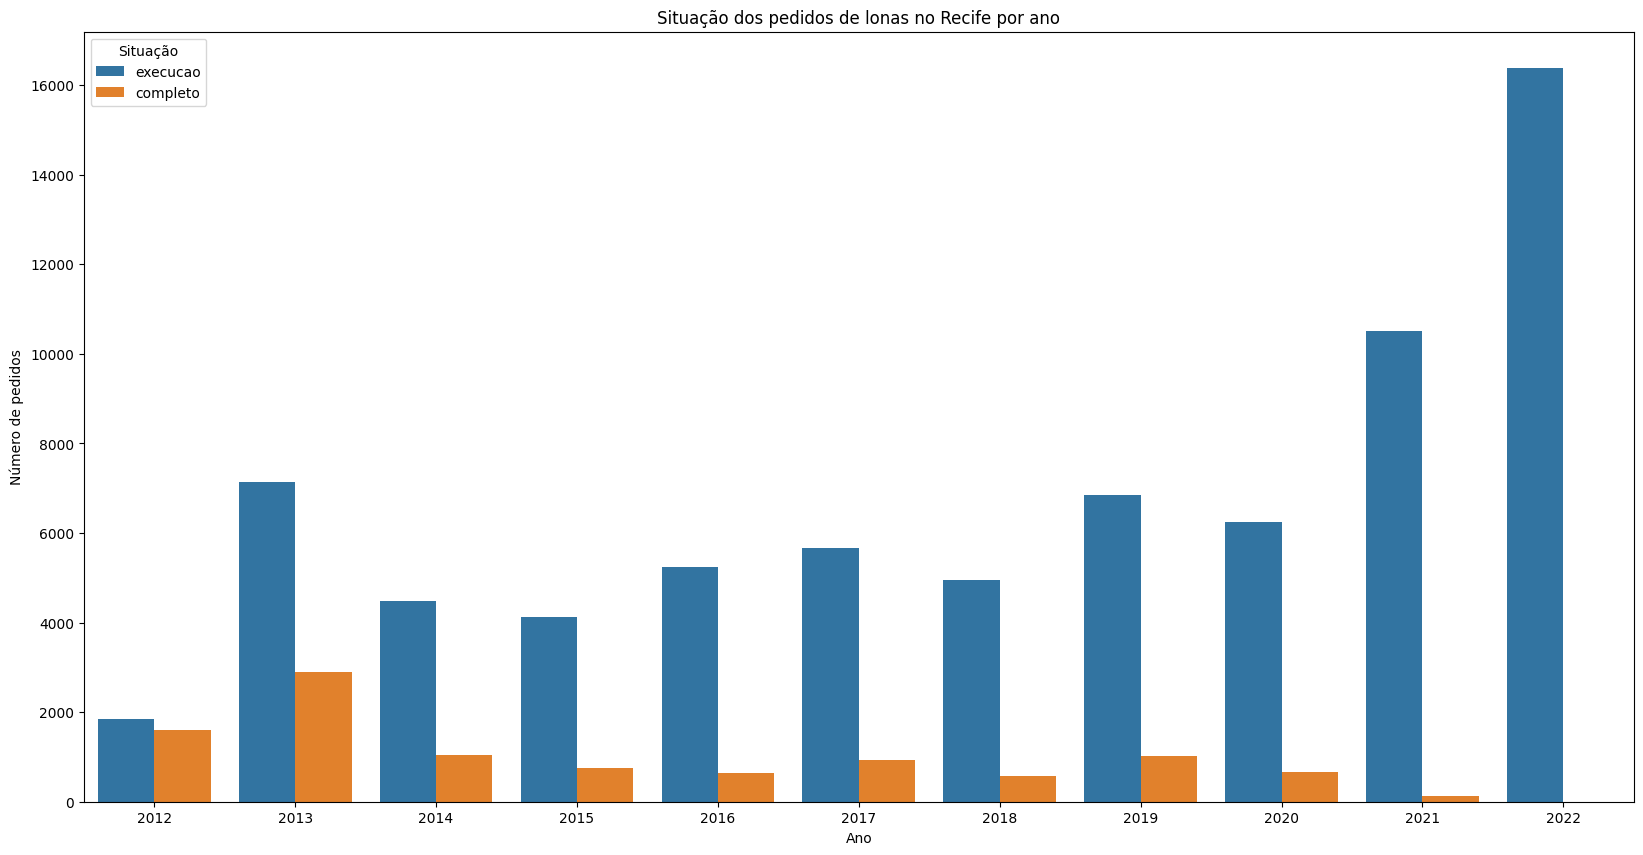

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.title("Situação dos pedidos de lonas no Recife por ano")

#Removendo o ano de 2023
df_filtered = df[df['ano'] != 2023]

ax = sns.countplot(x="ano", hue="processo_situacao", data=df_filtered)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de pedidos')
ax.legend(title='Situação')

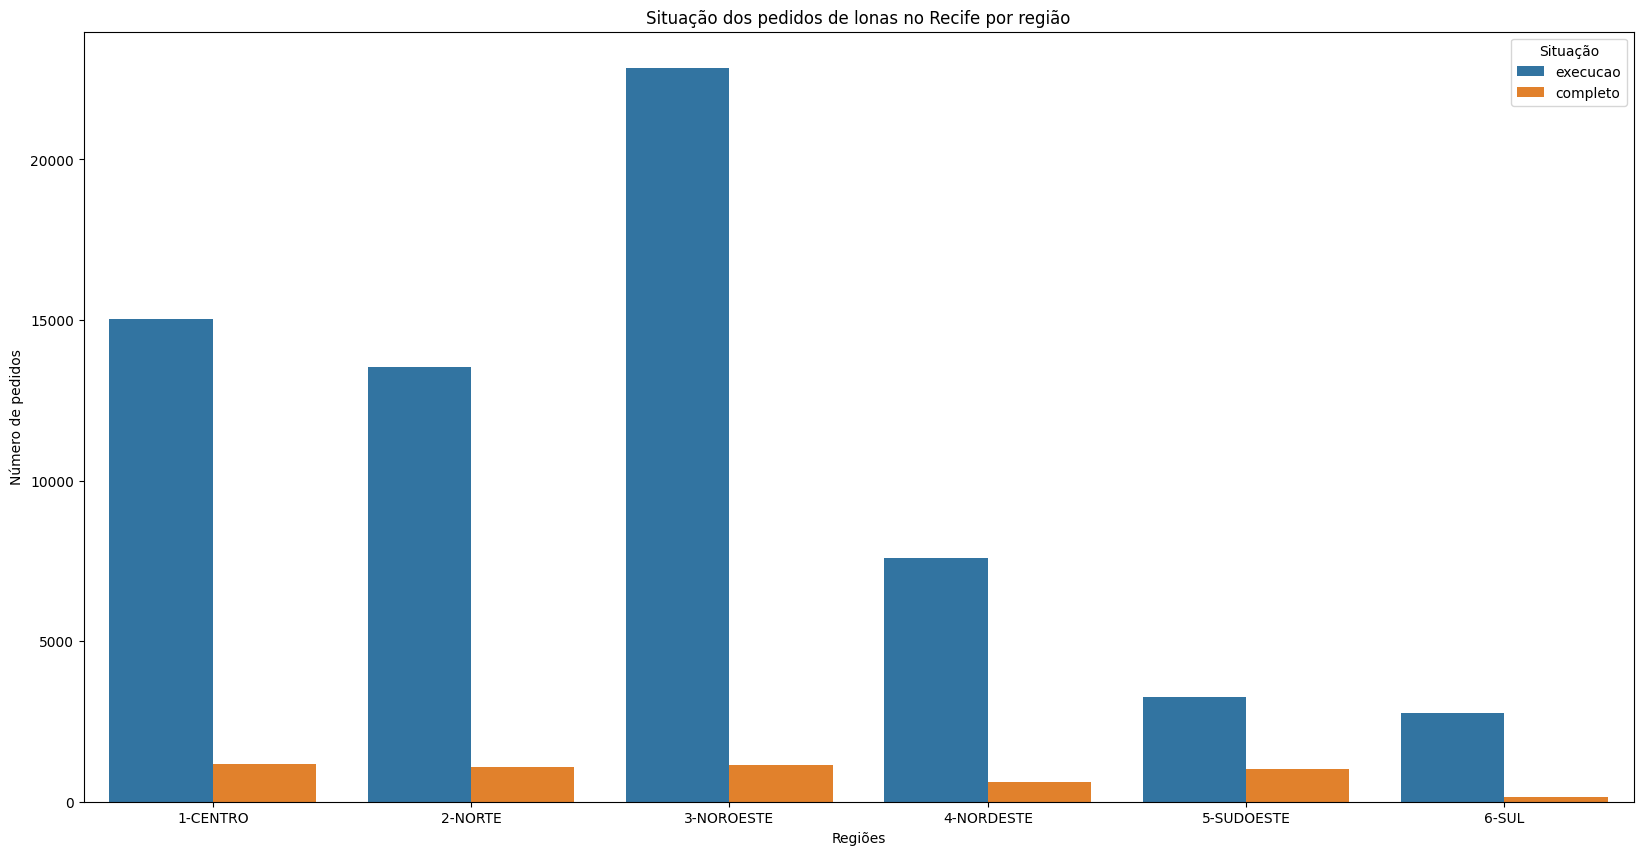

In [ ]:
#Importando biblioteca matplotlib para visualização dos dados
from matplotlib import pyplot as plt
#importando a biblioteca seaborn para a geração de gráficos mais sofisticados
import seaborn as sns
plt.figure(figsize=(20,10))
plt.title("Situação dos pedidos de lonas no Recife por região")



# Retirando os dados das regiões não informadas
df_filtered = df[df['rpa_nome'] != 'Não informado']

# Ordenando as regiões  em ordem alfabética
df_filtered = df_filtered.sort_values('rpa_nome')

# Gerando o gráfico de barras com os dados filtrados e ordenados
ax = sns.countplot(x="rpa_nome", hue="processo_situacao", data=df_filtered)
ax.set_xlabel('Regiões')
ax.set_ylabel('Número de pedidos')
ax.legend(title='Situação')

Percebam que a quantidade de dados e as formas de visualizações escolhidas impactam na qualidade para um bom processo de tomada de decisão. Como melhorar isso?